In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [24]:
# 키워드 데이터 불러오기
contents = pd.read_csv('/gdrive/Shared drives/datathon_2021/contents.csv',encoding='cp949')

In [25]:
contents.head()

,동아리,공연,음악,댄스,밴드,연극&뮤지컬,마술,기타,피아노,버스킹,아카펠라,힙합,봉사,교육봉사,환경보호,벽화그리기,고양이,자기계발,문화교류,영어회화,코딩,아이디어&창작,취미,예술,그림,손글씨,영화,와인,게임,여행,인문 과학,인문학,토론,국제이슈,뇌과학,생태탐사,인권,사회참여,종교,가톨릭,기독교,불교,원불교,세계선교,체육,축구&풋살,농구,야구,활,배드민턴,자전거,실내운동,수영,탁구,학번제한 유무,동아리방 유무
0,JASS,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,TTP,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,고대농악대,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,고전기타부,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,고려대학교 관악부,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


동아리명 컬럼은 한글이므로 제외/향후 추천 때 불러올 예정

In [26]:
contents_rm_name = contents.drop(['동아리'], axis = 1)

In [27]:
contents_rm_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   공연       82 non-null     int64
 1   음악       82 non-null     int64
 2   댄스       82 non-null     int64
 3   밴드       82 non-null     int64
 4   연극&뮤지컬   82 non-null     int64
 5   마술       82 non-null     int64
 6   기타       82 non-null     int64
 7   피아노      82 non-null     int64
 8   버스킹      82 non-null     int64
 9   아카펠라     82 non-null     int64
 10  힙합       82 non-null     int64
 11  봉사       82 non-null     int64
 12  교육봉사     82 non-null     int64
 13  환경보호     82 non-null     int64
 14  벽화그리기    82 non-null     int64
 15  고양이      82 non-null     int64
 16  자기계발     82 non-null     int64
 17  문화교류     82 non-null     int64
 18  영어회화     82 non-null     int64
 19  코딩       82 non-null     int64
 20  아이디어&창작  82 non-null     int64
 21  취미       82 non-null     int64
 22  예술       82 non-null     int

In [28]:
c_sim = cosine_similarity(contents_rm_name).argsort()[:,::-1]

In [29]:
def get_recommend_club_list(df, club_name, top=30):
  # 해당 동아리에 대한 index 정보를 뽑아 냄.
  target_club_index = contents[contents['동아리'] == club_name].index.values

  # 비슷한 코사인 유사도를 가진 정보를 뽑아 냄. 
  sim_index = c_sim[target_club_index, :top].reshape(-1)

  # 본인 제외
  sim_index = sim_index[sim_index != target_club_index]

  # dataframe으로 만든 뒤 return
  result = df.iloc[sim_index][:5]['동아리']
  result = pd.DataFrame(result)
  result.columns = [club_name]
  return result

In [30]:
get_recommend_club_list(contents, club_name = 'TERRA')

,TERRA
8,노래얼
9,크림슨
0,JASS
2,고대농악대
4,고려대학교 관악부


In [31]:
clubname = pd.DataFrame({"clubname":contents['동아리']})

for i in range(len(clubname)):
  temp = get_recommend_club_list(contents, club_name = clubname.values[i][0]).T
  temp.columns = ['rec_1','rec_2','rec_3','rec_4','rec_5']
  if i == 0 :
    contents_based_recom = temp
  else :
    contents_based_recom = pd.concat([contents_based_recom, temp],axis=0,ignore_index=True)
  
contents_based_recom = pd.concat([clubname, contents_based_recom],axis=1)
contents_based_recom

,clubname,rec_1,rec_2,rec_3,rec_4,rec_5
0,JASS,고대농악대,고려대학교 합창단,고려대학교 관악부,고려대학교 관현악단,국악연구회
1,TTP,크림슨,노래얼,고려대학교 관현악단,고려대학교 합창단,국악연구회
2,고대농악대,JASS,고려대학교 합창단,고려대학교 관악부,고려대학교 관현악단,국악연구회
3,고전기타부,그루터기,JASS,고대농악대,고려대학교 관악부,고려대학교 관현악단
4,고려대학교 관악부,JASS,고대농악대,고려대학교 합창단,고려대학교 관현악단,국악연구회
...,...,...,...,...,...,...
77,수호회,한량회,KULAX,택견한울,ENTHES,FC엘리제
78,아마추어축구부,FC엘리제,고풋,한량회,택견한울,ENTHES
79,탁구사랑회,한량회,KULAX,택견한울,ENTHES,FC엘리제
80,택견한울,ENTHES,KULAX,한량회,궁도회,FC엘리제


In [32]:
contents_based_recom.to_csv('/gdrive/Shared drives/datathon_2021/result_contents_based.csv') # csv파일로 결과 저장

## 키워드 데이터 EDA

In [33]:
table = contents.sum()[1:]
table = table.sort_values(ascending=False)
len(table.index[1:]) # 총 54개의 키워드

54

In [34]:
round(table.mean(),3) # 키워드 내 동아리 평균

5.127

In [37]:
table1 = table.sort_values(ascending=False)[:33] # 빈도 2 이상인 키워드 table
pd.DataFrame(table1,columns=['count'])

,count
동아리방 유무,78
공연,19
음악,17
체육,14
인문 과학,13
취미,12
예술,9
학번제한 유무,9
종교,9
봉사,8


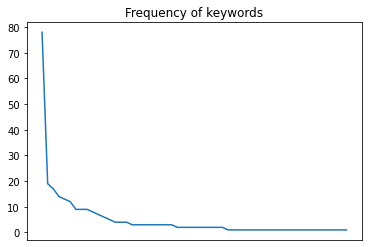

In [38]:
from matplotlib import pyplot as plt
plt.plot(table)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.title('Frequency of keywords')
plt.show()